In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import os
from IPython.display import Image
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
def plot_progress(losses, y_lims=[(0,1.2), (-0.05,1.05), (0,0.6)], savename=None):
    
    fig = plt.figure(figsize=(18,9))

    gs = gridspec.GridSpec(2, 2)

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])

    ax1.set_title('Adversarial Losses', fontsize=30)
    ax2.set_title('Adversarial Accuracies', fontsize=30)
    ax3.set_title('Self-Regularization Losses', fontsize=30)

    ax1.plot(losses['batch_iters'], losses['gen_loss_loss_train'], label=r'R$_{tr}$')
    ax1.plot(losses['batch_iters'], losses['gen_loss_loss_val'], label=r'R$_{val}$')
    ax1.plot(losses['batch_iters'], losses['dis_true_loss_train'], label=r'D$_{tr,\ real}$')
    ax1.plot(losses['batch_iters'], losses['dis_fake_loss_train'], label=r'D$_{tr,\ fake}$')
    ax1.plot(losses['batch_iters'], losses['dis_true_loss_val'], label=r'D$_{val,\ real}$')
    ax1.plot(losses['batch_iters'], losses['dis_fake_loss_val'], label=r'D$_{val,\ fake}$')
    ax1.set_ylabel('Loss',fontsize=25)
    ax1.set_ylim(*y_lims[0])
    
    ax2.plot(losses['batch_iters'], losses['gen_acc_train'], label=r'R$_{tr}$')
    ax2.plot(losses['batch_iters'], losses['gen_acc_val'], label=r'R$_{val}$')
    ax2.plot(losses['batch_iters'], losses['dis_true_acc_train'], label=r'D$_{tr,\ real}$')
    ax2.plot(losses['batch_iters'], losses['dis_fake_acc_train'], label=r'D$_{tr,\ fake}$')
    ax2.plot(losses['batch_iters'], losses['dis_true_acc_val'], label=r'D$_{val,\ real}$')
    ax2.plot(losses['batch_iters'], losses['dis_fake_acc_val'], label=r'D$_{val,\ fake}$')
    ax2.set_ylabel('Loss',fontsize=25)
    ax2.set_ylim(*y_lims[1])
    
    ax3.plot(losses['batch_iters'], losses['reg_loss_loss_train'],
             label=r'Train')
    ax3.plot(losses['batch_iters'], losses['reg_loss_loss_val'],
             label=r'Validation')
    ax3.set_ylim(*y_lims[2])
    

    for i, ax in enumerate([ax1, ax2, ax3]):
        ax.set_xlabel('Batch Iterations',fontsize=25)
        ax.tick_params(labelsize=20)
        ax.legend(fontsize=20, ncol=2)
        ax.grid(True)

    plt.tight_layout()
    
    if savename is not None:
        plt.savefig(savename)
        
    plt.show()
    
def show_samples(model_name):
    # Create widgets
    directory = widgets.Dropdown(options=[os.path.join('results/', model_name+'/', 'val/'), 
                                          os.path.join('results/', model_name+'/', 'train/')])
    files = os.listdir(directory.value)
    files = [files[i] for i in np.argsort([int(f.split('_')[-1][:-4]) for f in files])]
    images = widgets.Dropdown(options=files)

    # Updates the image options based on directory value
    def update_images(*args):
        files = os.listdir(directory.value)
        images.options = [files[i] for i in np.argsort([int(f.split('_')[-1][:-4]) for f in files])]

    # Tie the image options to directory value
    directory.observe(update_images, 'value')

    # Show the images
    def show_images(fdir, file):
        display(Image(f'{fdir}/{file}'))

    _ = interact(show_images, fdir=directory, file=images)

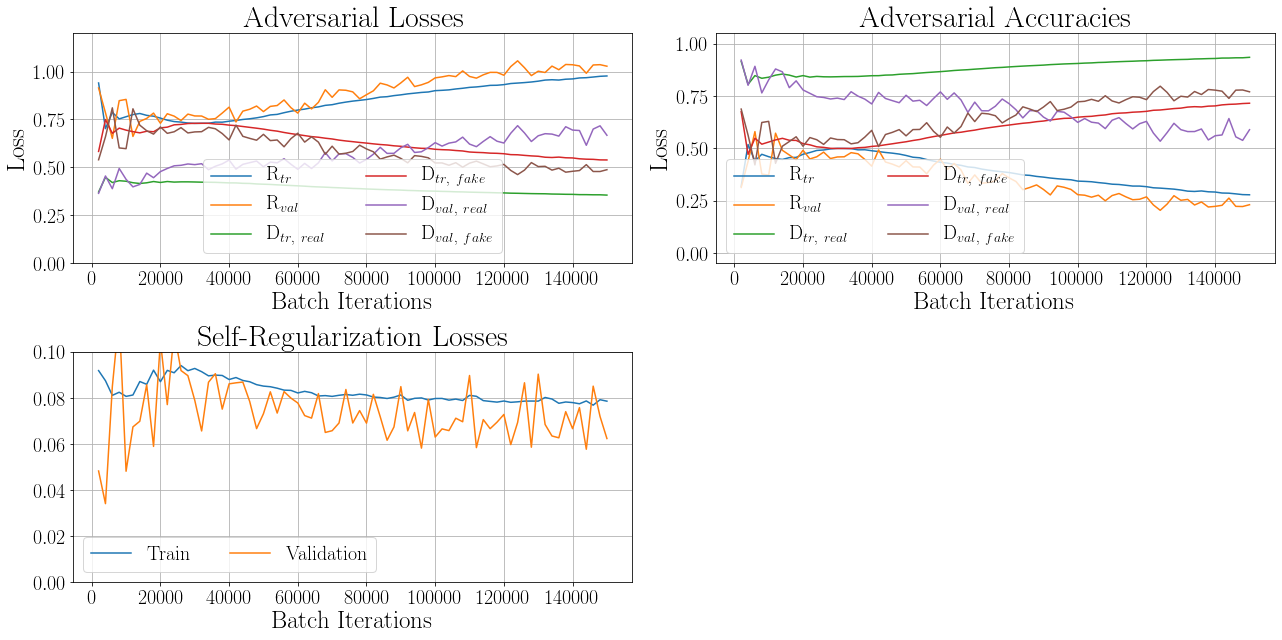

In [3]:
model_name = 'hlt_to_nod_1'
losses = np.load(os.path.join('progress/', model_name+'_losses.npy'), allow_pickle=True).item()
plot_progress(losses, y_lims=[(0,1.2), (-0.05,1.05), (0,0.1)])
plt.close('all')

In [4]:
show_samples(model_name)

interactive(children=(Dropdown(description='fdir', options=('results/hlt_to_nod_1/val/', 'results/hlt_to_nod_1…